/tmp/ipython-input-2121480515.py:60: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


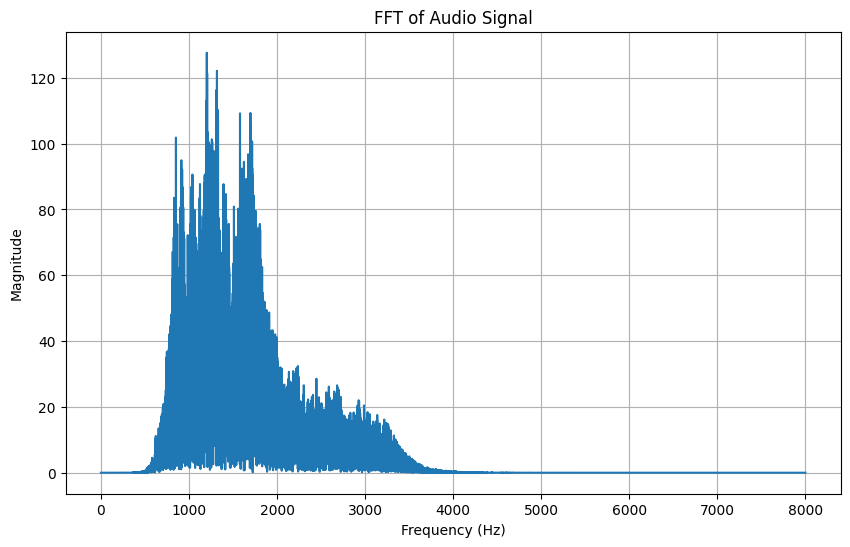

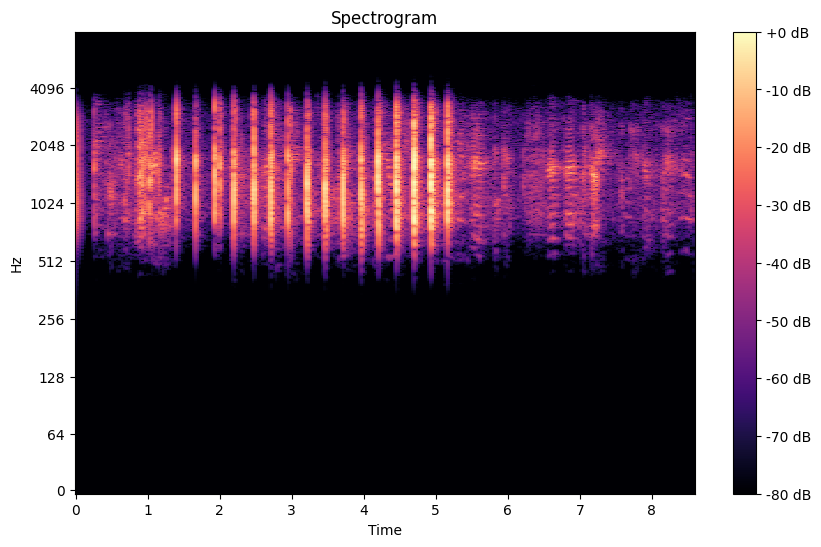

In [10]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import librosa
import librosa.display
import wave
import os

# Load audio file
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

# Apply a low-pass, high-pass, or band-pass filter
def apply_filter(audio, sr, filter_type='lowpass', cutoff_freq=1000, order=4):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff_freq / nyquist

    if filter_type == 'lowpass':
        b, a = signal.butter(order, normal_cutoff, btype='low')
    elif filter_type == 'highpass':
        b, a = signal.butter(order, normal_cutoff, btype='high')
    else:
        raise ValueError("Invalid filter type! Choose 'lowpass', 'highpass', or 'bandpass'.")

    filtered_audio = signal.filtfilt(b, a, audio)
    return filtered_audio


def apply_bandpass_filter(audio, sr, low_freq, high_freq, order=4):
    nyquist = 0.5 * sr
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_audio = signal.filtfilt(b, a, audio)
    return filtered_audio



# Generate FFT and plot the frequency domain
def plot_fft(audio, sr):
    # Compute FFT
    N = len(audio)
    fft = np.fft.fft(audio)
    freqs = np.fft.fftfreq(N, 1/sr)
    magnitude = np.abs(fft)[:N//2]
    freqs = freqs[:N//2]

    plt.figure(figsize=(10, 6))
    plt.plot(freqs, magnitude)
    plt.title('FFT of Audio Signal')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    #plt.show()

# Generate Spectrogram using librosa
def plot_spectrogram(audio, sr):
    plt.figure(figsize=(10, 6))
    D = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

# Audio Pattern Detection (Silence, Clapping, Snapping, Knocking)
def detect_patterns(audio, sr):
    # Simple silence detection based on thresholding
    silence_threshold = 0.01  # Set a low threshold for silence detection
    silence = np.where(np.abs(audio) < silence_threshold, 1, 0)

    # Detect events (e.g., clapping, snapping, knocking) based on peaks in signal
    peaks, _ = signal.find_peaks(np.abs(audio), height=0.2)  # Height for detecting significant peaks

    # Visualization of detected peaks (could be clapping, snapping, or knocking)
    plt.figure(figsize=(10, 6))
    plt.plot(audio)
    plt.plot(peaks, audio[peaks], 'ro', label="Detected Peaks")
    plt.title('Pattern Detection (Claps, Snaps, or Knocks)')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    #plt.show()

    # Basic analysis: print detected patterns
    print(f"Silence detected at indices: {np.where(silence == 1)[0]}")
    print(f"Detected peaks at indices: {peaks}")

# Main function to execute the pipeline
def process_audio(file_path):
    audio, sr = load_audio(file_path)

    # Apply filters (example: lowpass filter with cutoff at 1000 Hz)
    #filtered_audio = apply_filter(audio, sr, filter_type='bandpass', cutoff_freq=1000)
    filtered_audio = apply_bandpass_filter(audio, sr, 800, 3000)

    # Generate FFT and Spectrogram
    plot_fft(filtered_audio, sr)
    plot_spectrogram(filtered_audio, sr)
    plt.show()

    # Detect audio patterns
    #detect_patterns(filtered_audio, sr)

# Run the script
if __name__ == "__main__":
    # Specify your audio file path
    file_path = 'rec_4648.wav'  # Replace with your actual file path
    if os.path.exists(file_path):
        process_audio(file_path)
    else:
        print(f"File {file_path} not found. Please provide a valid path.")

--- Audio Characteristics for rec_4648.wav ---
Sample Rate (SR):   16000 Hz
Duration:           8.5760 seconds
Total Samples:      137216
Shape:              (137216,)
----------------------------------------


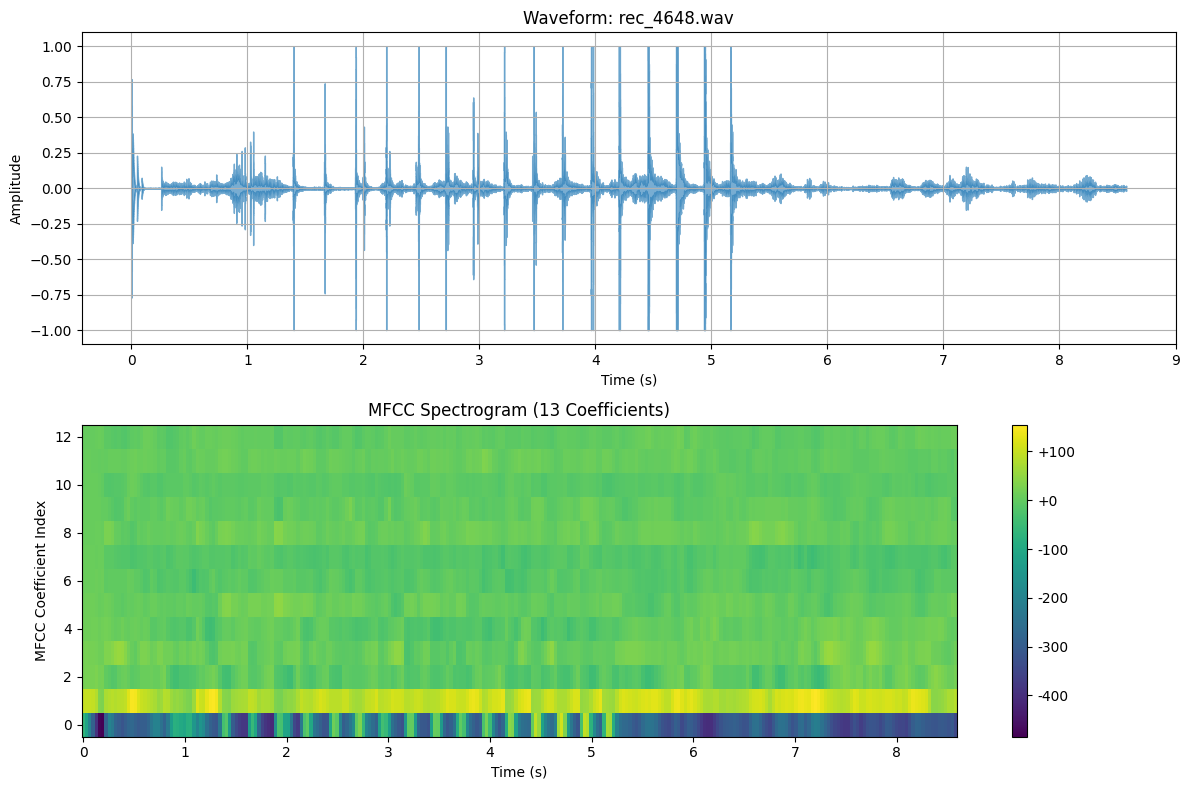

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


def analyze_audio_mfcc(file_path):
    # 1. Load the Audio File
    # sr=None ensures we read the native sample rate (important for checking data quality)
    y, sr = librosa.load(file_path, sr=None)

    # 2. Display Audio Characteristics
    duration = librosa.get_duration(y=y, sr=sr)

    print(f"--- Audio Characteristics for {file_path} ---")
    print(f"Sample Rate (SR):   {sr} Hz")
    print(f"Duration:           {duration:.4f} seconds")
    print(f"Total Samples:      {len(y)}")
    print(f"Shape:              {y.shape}")
    print("-" * 40)

    # 3. Generate Representations
    plt.figure(figsize=(12, 8))

    # Plot 1: The Waveform (Time Domain)
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    plt.title(f'Waveform: {file_path}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Plot 2: MFCC Spectrogram (Feature Domain)
    # We extract 13 coefficients, which is standard for speech/keyword spotting
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    plt.subplot(2, 1, 2)
    # Visualize the MFCCs
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f')
    plt.title('MFCC Spectrogram (13 Coefficients)')
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficient Index')
    plt.yticks(np.arange(0, 13, 2))  # Show indices 0, 2, 4... for clarity

    plt.tight_layout()
    plt.show()


# Run the function on your attached file
# Ensure the file is in the same directory or provide the full path
file_name = 'rec_4648.wav'

try:
    analyze_audio_mfcc(file_name)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found. Please ensure the file is in your working directory.")

--- Audio Characteristics for rec_4648.wav ---
Sample Rate (SR):   16000 Hz
Duration:           8.5760 seconds
Total Samples:      137216
Shape (Channels):   (137216,) (Mono)
----------------------------------------


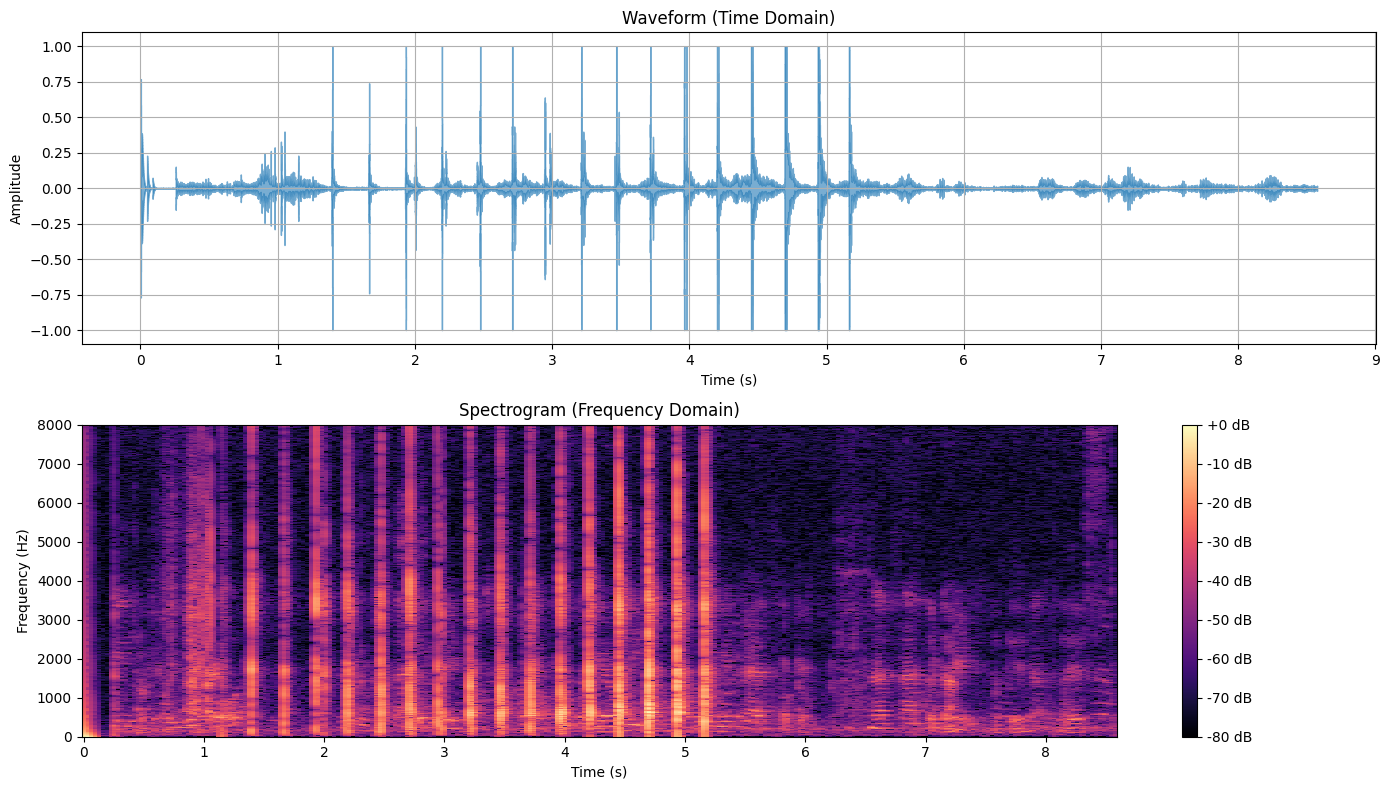

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


def analyze_audio(file_path):
    # 1. Load the Audio File
    # sr=None tells librosa to use the file's native sample rate rather than resampling
    y, sr = librosa.load(file_path, sr=None)

    # 2. Display Audio Characteristics
    duration = librosa.get_duration(y=y, sr=sr)

    print(f"--- Audio Characteristics for {file_path} ---")
    print(f"Sample Rate (SR):   {sr} Hz")
    print(f"Duration:           {duration:.4f} seconds")
    print(f"Total Samples:      {len(y)}")
    print(f"Shape (Channels):   {y.shape} (Mono)" if y.ndim == 1 else f"Shape: {y.shape} (Stereo)")
    print("-" * 40)

    # 3. Generate Representations
    plt.figure(figsize=(14, 8))

    # Top Plot: The Waveform (Time Domain)
    # Shows amplitude changes over time (Good for seeing silence vs. activity)
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr, alpha=0.6)
    plt.title('Waveform (Time Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # Bottom Plot: The Spectrogram (Frequency Domain)
    # 1. Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(y)
    # 2. Convert amplitude to Decibels (Log scale) for visualization
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.subplot(2, 1, 2)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram (Frequency Domain)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')

    plt.tight_layout()
    plt.show()


# Run the function on your file
file_name = 'rec_4648.wav'
try:
    analyze_audio(file_name)
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please check the path.")